In [1]:
import MLP
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 数据增强，在5-1中筛选了数据进行补充，其余作为测试数据

In [11]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
#聚类筛选的数据，从step5-1中直接复制
TrainData,TestData={},{}
for k in data.keys():
    TrainData[k]=data[k]
    TestData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(int(0.8*TrainData[k].shape[0])-step-1):
        xtrain.append(TrainData[k][i:i+step,:TrainData[k].shape[1]-5].reshape((1,-1)).tolist()[0])
        ytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())

xtrain = Variable(torch.FloatTensor(xtrain))
ytrain = Variable(torch.FloatTensor(ytrain))
print(xtrain.shape,ytrain.shape)

torch.Size([34684, 300]) torch.Size([34684, 5])


In [14]:
ind = np.random.randint(0,xtrain.shape[0],int(xtrain.shape[0]*0.7))
print(ind.shape)
np.save('./0.7alldata.npy',ind)

(24278,)


# MLP

## 训练

In [33]:
param={
    'inputsize':xtrain.shape[1],
    'outputsize':ytrain.shape[1],
    'layers':[20 for _ in range(40)],
    'act':['tanh' for _ in range(40)]+['tanh'],
    'learning_rate':0.001,
    'opt':'Adam',
}

MLP(
  (model): Sequential(
    (input): Linear(in_features=300, out_features=20, bias=True)
    (h1): Linear(in_features=20, out_features=20, bias=True)
    (h2): Linear(in_features=20, out_features=20, bias=True)
    (h3): Linear(in_features=20, out_features=20, bias=True)
    (h4): Linear(in_features=20, out_features=20, bias=True)
    (h5): Linear(in_features=20, out_features=20, bias=True)
    (h6): Linear(in_features=20, out_features=20, bias=True)
    (h7): Linear(in_features=20, out_features=20, bias=True)
    (h8): Linear(in_features=20, out_features=20, bias=True)
    (h9): Linear(in_features=20, out_features=20, bias=True)
    (h10): Linear(in_features=20, out_features=20, bias=True)
    (h11): Linear(in_features=20, out_features=20, bias=True)
    (h12): Linear(in_features=20, out_features=20, bias=True)
    (h13): Linear(in_features=20, out_features=20, bias=True)
    (h14): Linear(in_features=20, out_features=20, bias=True)
    (h15): Linear(in_features=20, out_features=2

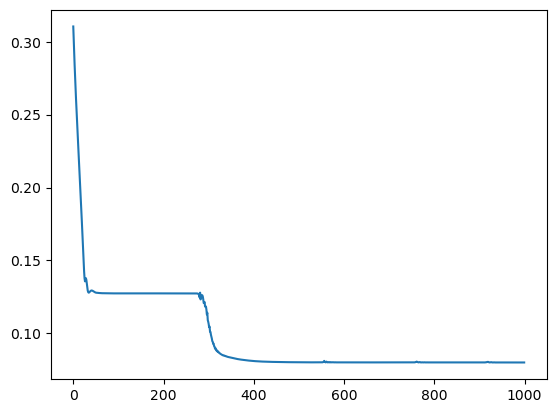

In [34]:
train=True
initial_train=True
net = MLP.MLP(param)
print(net)
if train:
    if not initial_train:
        net=torch.load('./model/MLP.pth')
    optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    mse,vmse=[],[]
    xt, yt = xtrain[ind], ytrain[ind]
    xv, yv = xtrain, ytrain
    for t in range(1000):
        prediction = net(xt)
        loss = loss_func(prediction,yt)
                
        vp = net(xv)
        lossv = loss_func(vp,yv)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mse.append(loss.detach().numpy())
        vmse.append(lossv.detach().numpy())
        if np.mod(t,10)==0:
            torch.save(net,'./model/MLP'+str(t)+'.pth')
            torch.save(net,'./model/MLP.pth')
            #np.save('./mse'+str(t)+'.npy',mse)

    plt.plot(mse)
    torch.save(net.model,'./model/MLP.pth')
else:
    net=torch.load('./model/MLP.pth')

# 测试

In [35]:
test_data = np.load('./databygroup.npy',allow_pickle=True).tolist()
#聚类筛选的数据，从step5-1中直接复制
TrainData,TestData={},{}
for k in data.keys():
    TrainData[k]=test_data[k]
    TestData[k]=test_data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
test_xtrain,test_ytrain=[],[]
for k in TrainData.keys():
    for i in range(TrainData[k].shape[0]-step-1):
        test_xtrain.append(TrainData[k][i:i+step,:TrainData[k].shape[1]-5].reshape((1,-1)).tolist()[0])
        test_ytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
test_xtrain = Variable(torch.FloatTensor(test_xtrain))
test_ytrain = Variable(torch.FloatTensor(test_ytrain))

print(test_xtrain.shape, test_ytrain.shape)

torch.Size([43784, 300]) torch.Size([43784, 5])


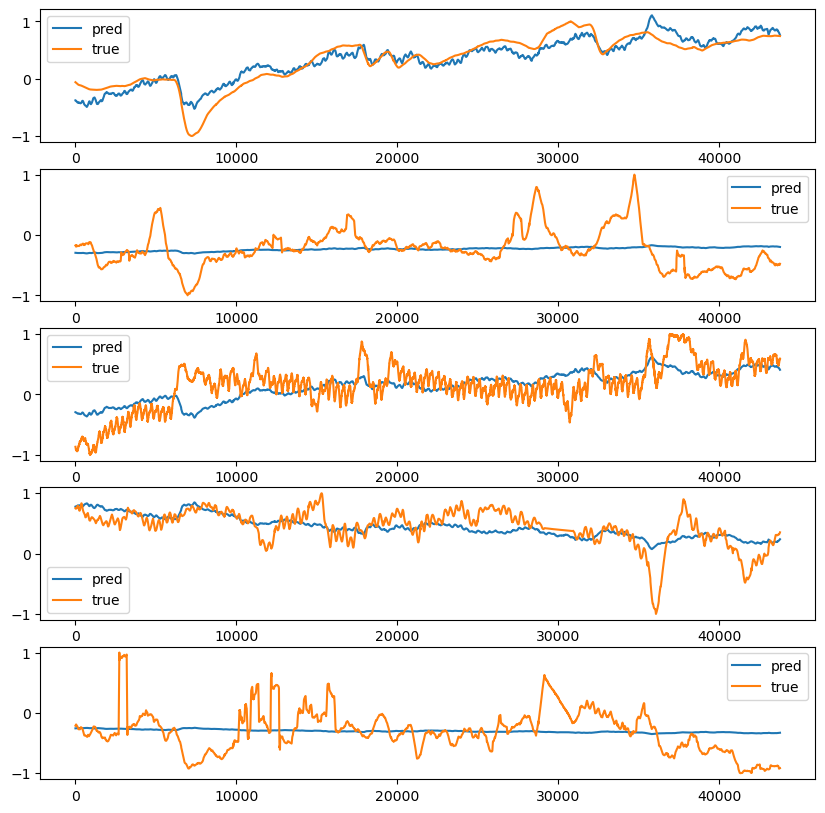

In [36]:
yp = net(test_xtrain)
fig,ax=plt.subplots(5,1,figsize=(10,10))
for i in range(5):
    ax[i].plot(yp.detach().numpy()[:,i],label='pred')
    ax[i].plot(test_ytrain.detach().numpy()[:,i],label='true')
    
    ax[i].legend()

In [37]:
for f in TestData.keys():
    step=20
    xtest,ytest=[],[]
    for i in range(TestData[f].shape[0]-step-1):
        xtest.append(TestData[f][i:i+step,:TestData[f].shape[1]-5].reshape((1,-1)).tolist()[0])
        ytest.append(TestData[f][i+1+step,[-5,-4,-3,-2,-1]].tolist())
    xtest = Variable(torch.FloatTensor(xtest))
    ytest = Variable(torch.FloatTensor(ytest))
    print(xtest.shape,f)
    yp = net(xtest)
    #mse = np.sqrt(np.mean(np.square(y1.detach().numpy()-yp.detach().numpy())))
    pd.DataFrame(yp.detach().numpy()).to_csv('./results/MLP/results_'+f)

torch.Size([4979, 300]) historydata
torch.Size([573, 300]) sub1
torch.Size([509, 300]) sub2
torch.Size([509, 300]) sub3
torch.Size([510, 300]) sub4
torch.Size([573, 300]) sub5
torch.Size([520, 300]) sub6
torch.Size([564, 300]) sub7
torch.Size([535, 300]) sub8
torch.Size([534, 300]) sub9
torch.Size([509, 300]) sub10
torch.Size([555, 300]) sub11
torch.Size([530, 300]) sub12
torch.Size([505, 300]) sub13
torch.Size([486, 300]) sub14
torch.Size([576, 300]) sub15
torch.Size([552, 300]) sub16
torch.Size([482, 300]) sub17
torch.Size([497, 300]) sub18
torch.Size([570, 300]) sub19
torch.Size([504, 300]) sub20
torch.Size([502, 300]) sub21
torch.Size([568, 300]) sub22
torch.Size([512, 300]) sub23
torch.Size([498, 300]) sub24
torch.Size([534, 300]) sub25
torch.Size([514, 300]) sub26
torch.Size([514, 300]) sub27
torch.Size([556, 300]) sub28
torch.Size([559, 300]) sub29
torch.Size([575, 300]) sub30
torch.Size([526, 300]) sub31
torch.Size([485, 300]) sub32
torch.Size([525, 300]) sub33
torch.Size([543,